<a href="https://colab.research.google.com/github/Tdogthe1/Skyline-Math-200/blob/main/Python_Notebook_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 1 :  Is there an association between What time do you usually wake up and how many times do you do strenuous sports (Week)?

Research Question # 2 :  Is there an association between Your most recent degree/certificate received and the amount of siblings (Dead and Alive)?

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


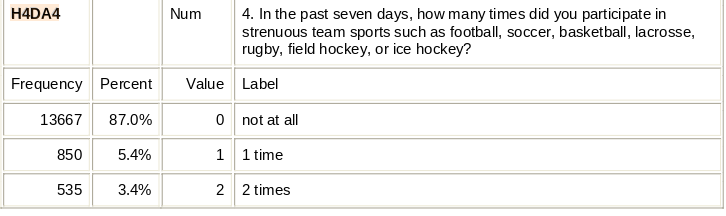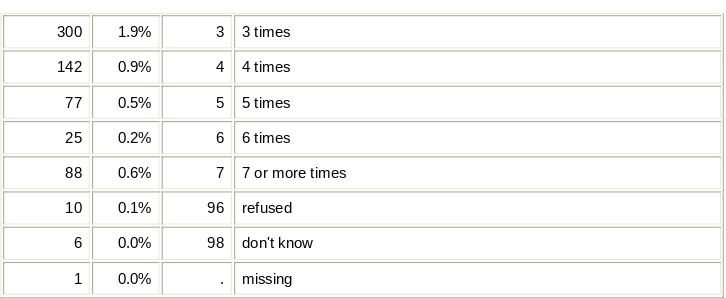 Codebook 1

In [180]:
df['H4DA4'].value_counts()

0     4466
      1391
1      284
2      164
3       99
4       48
7       30
5       16
6        4
98       1
96       1
Name: H4DA4, dtype: int64

In [181]:
df['Strenuous_sports'] = df['H4DA4']

In [182]:
df['Strenuous_sports'] = df['Strenuous_sports'].loc[ df['Strenuous_sports'] !='98']
df['Strenuous_sports'] = df['Strenuous_sports'].loc[ df['Strenuous_sports'] !='96']
df['Strenuous_sports'] = df['Strenuous_sports'].loc[ df['Strenuous_sports'] !=' ']
df['Strenuous_sports'].value_counts()

0    4466
1     284
2     164
3      99
4      48
7      30
5      16
6       4
Name: Strenuous_sports, dtype: int64

In [183]:
df['Strenuous_sports'].replace( ['0','1','2','3','4','5','6','7'], ['not at all','1 Time','2 Times','3 Times','4 Times','5 Times','6 Times','7 Times or more'], inplace=True)
df['Strenuous_sports'].value_counts()

not at all         4466
1 Time              284
2 Times             164
3 Times              99
4 Times              48
7 Times or more      30
5 Times              16
6 Times               4
Name: Strenuous_sports, dtype: int64

<Axes: ylabel='Strenuous_sports'>

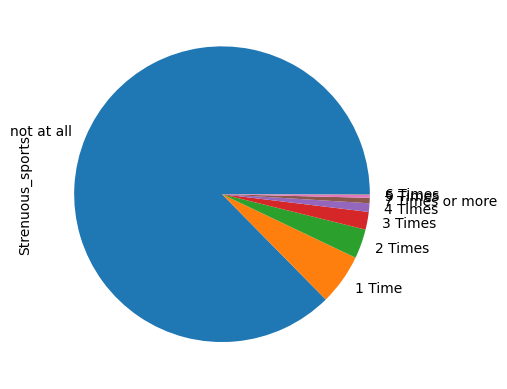

In [184]:
#Basic Pie Chart
df['Strenuous_sports'].value_counts().plot(kind ='pie')

<Axes: >

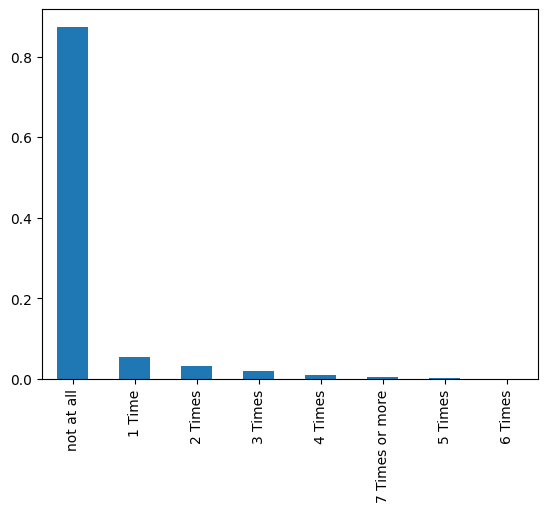

In [185]:
#Basic Bar Chart
df['Strenuous_sports'].value_counts(normalize = True).plot(kind ='bar')

In [186]:
df['H4SP1H'].value_counts()

6     1582
      1390
7     1078
5     1007
8      406
4      309
9      261
10     139
3       95
11      72
12      64
2       48
1       40
98      12
96       1
Name: H4SP1H, dtype: int64

In [187]:
df['Wake_Up_hour'] = df['H4SP1H']

In [188]:
df['Wake_Up_hour'] = df['Wake_Up_hour'].loc[ df['Wake_Up_hour'] !='98']
df['Wake_Up_hour'] = df['Wake_Up_hour'].loc[ df['Wake_Up_hour'] !='96']
df['Wake_Up_hour'] = df['Wake_Up_hour'].loc[ df['Wake_Up_hour'] !=' ']
df['Wake_Up_hour']= pd.to_numeric(df['Wake_Up_hour'],errors= 'coerce')
df['Wake_Up_hour'].value_counts()

6.0     1582
7.0     1078
5.0     1007
8.0      406
4.0      309
9.0      261
10.0     139
3.0       95
11.0      72
12.0      64
2.0       48
1.0       40
Name: Wake_Up_hour, dtype: int64

In [189]:
df['Wake_Up_minute']= df['H4SP1M']
df['Wake_Up_minute']= pd.to_numeric(df['Wake_Up_minute'],errors= 'coerce')
df['Wake_Up_minute']= df['Wake_Up_minute'].loc[df['Wake_Up_minute'] < 96]
df['Wake_Up_minute']= df['Wake_Up_minute'].loc[df['Wake_Up_minute'] != ' ']
df['Wake_Up_minute'].value_counts()

0.0     2776
30.0    1599
45.0     306
15.0     206
20.0      46
40.0      34
3.0       33
50.0      30
10.0      15
25.0      10
55.0       9
1.0        8
35.0       8
5.0        8
7.0        2
43.0       1
24.0       1
6.0        1
32.0       1
44.0       1
59.0       1
12.0       1
9.0        1
54.0       1
2.0        1
Name: Wake_Up_minute, dtype: int64

In [190]:
df['am_pm']=df['H4SP1T']
df['am_pm'] = df['am_pm'].loc[df['am_pm'] !=' ']
df['am_pm'] = df['am_pm'].loc[df['am_pm'] <'6']
df['am_pm'].replace(['1','2'],['AM','PM'],inplace=True)
df['am_pm'].value_counts()

AM    4843
PM     258
Name: am_pm, dtype: int64

In [191]:
df_time_convert = df[['am_pm', 'Wake_Up_hour', 'Wake_Up_minute']]

In [192]:
df_time_convert.dropna(inplace=True)

<ipython-input-192-9f90cf800d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [193]:
df_time_convert

,am_pm,Wake_Up_hour,Wake_Up_minute
1,AM,6.0,0.0
3,AM,9.0,0.0
7,AM,6.0,30.0
9,AM,9.0,30.0
11,AM,5.0,0.0
...,...,...,...
6499,AM,7.0,45.0
6500,AM,7.0,0.0
6501,AM,5.0,30.0
6502,AM,8.0,2.0


In [194]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [195]:
to_military_time_float('9','30','AM')

9.5

In [196]:
df_time_convert['Time Value (float)'] =  df_time_convert.apply(lambda x: to_military_time_float(x['Wake_Up_hour'],x['Wake_Up_minute'],x['am_pm']),axis = 1)

<ipython-input-196-c495247ffbcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] =  df_time_convert.apply(lambda x: to_military_time_float(x['Wake_Up_hour'],x['Wake_Up_minute'],x['am_pm']),axis = 1)


In [197]:
df= df.assign(military_time = df_time_convert['Time Value (float)'])

<Axes: xlabel='military_time', ylabel='Count'>

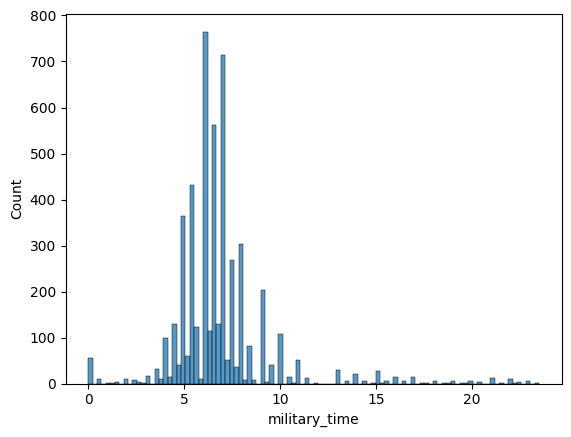

In [198]:
sns.histplot(x = 'military_time', data =df)

<Axes: xlabel='military_time'>

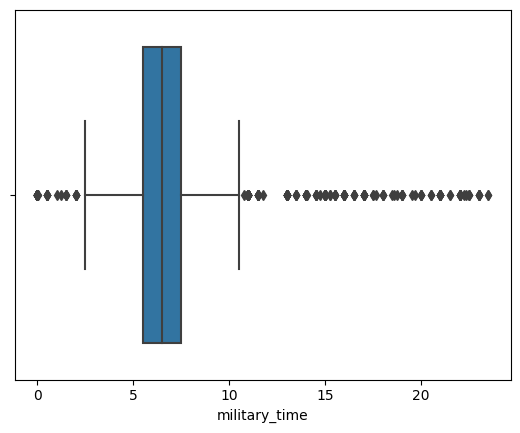

In [199]:
sns.boxplot(x = 'military_time', data =df)

In [200]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
import researchpy as rp

In [202]:
rp.summary_cont(df['military_time'].groupby(df['Strenuous_sports'])).round(2)

,N,Mean,SD,SE,95% Conf.,Interval
Strenuous_sports,,,,,,
1 Time,283,6.76,2.38,0.14,6.48,7.04
2 Times,164,7.15,3.16,0.25,6.67,7.64
3 Times,99,6.76,2.80,0.28,6.20,7.32
4 Times,48,6.81,2.09,0.30,6.20,7.42
5 Times,15,6.10,1.09,0.28,5.49,6.71
6 Times,4,5.50,1.02,0.51,3.88,7.12
7 Times or more,30,6.82,1.88,0.34,6.12,7.53
not at all,4454,6.88,2.61,0.04,6.80,6.95


<Axes: xlabel='military_time', ylabel='Strenuous_sports'>

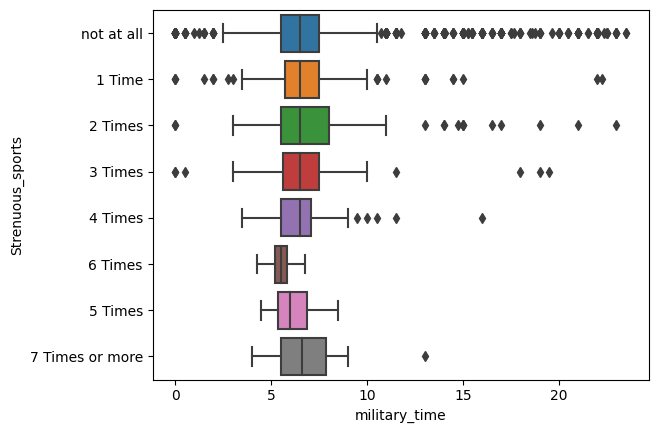

In [203]:
sns.boxplot( y ='Strenuous_sports' , x ='military_time' , data = df )

In [204]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [205]:
model = ols('military_time ~ C(Strenuous_sports)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Strenuous_sports),7.0,34.540225,4.934318,0.722769,0.65272
Residual,5089.0,34742.398794,6.826960,NaN,NaN


In [206]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['military_time'], df['Strenuous_sports'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

TypeError: ignored

In [173]:
post_hoc_res.plot_simultaneous(ylabel= "Color", xlabel= "Prices")

NameError: ignored

In [4]:
#Manage data for variable 1

In [5]:
#Graphs and tables or statistics

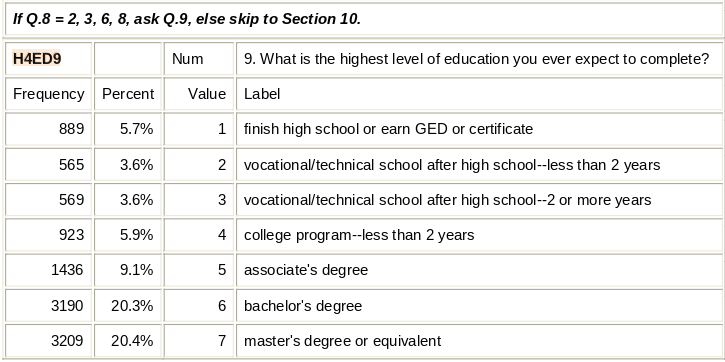Codebook 2:

In [6]:
#Manage data for variable 1

In [7]:
#Graphs and tables or statistics 

In [17]:
df['H4WS1'].value_counts()

      1390
1     1342
2     1265
3      813
4      539
5      305
0      242
6      215
7      141
8       84
9       56
10      35
11      20
12      14
98      10
20       8
13       8
15       6
17       4
14       4
96       1
16       1
19       1
Name: H4WS1, dtype: int64

In [18]:
df['EXP'] = df['H4WS1']

In [19]:
df['EXP'] = df['EXP'].loc[ df['EXP'] !='98']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='96']
df['EXP'] = df['EXP'].loc[ df['EXP'] !=' ']
df['EXP'].value_counts()

1     1342
2     1265
3      813
4      539
5      305
0      242
6      215
7      141
8       84
9       56
10      35
11      20
12      14
13       8
20       8
15       6
17       4
14       4
16       1
19       1
Name: EXP, dtype: int64

In [35]:
df['Siblings_Dead_Alive']= df['H4WS1']
df['Siblings_Dead_Alive']= pd.to_numeric(df['Siblings_Dead_Alive'],errors= 'coerce')
df['Siblings_Dead_Alive']= df['Siblings_Dead_Alive'].loc[df['Siblings_Dead_Alive'] < 96]
df['Siblings_Dead_Alive']= df['Siblings_Dead_Alive'].loc[df['Siblings_Dead_Alive'] != ' ']
df['Siblings_Dead_Alive'].value_counts()

1.0     1342
2.0     1265
3.0      813
4.0      539
5.0      305
0.0      242
6.0      215
7.0      141
8.0       84
9.0       56
10.0      35
11.0      20
12.0      14
13.0       8
20.0       8
15.0       6
17.0       4
14.0       4
16.0       1
19.0       1
Name: Siblings_Dead_Alive, dtype: int64

In [36]:
df['Siblings_Dead_Alive'] = df['H4WS1']
df['Siblings_Dead_Alive']= pd.to_numeric(df['Siblings_Dead_Alive'],errors= 'coerce')
df['Siblings_Dead_Alive']= df['Siblings_Dead_Alive'].loc[df['Siblings_Dead_Alive'] < 96]
df['Siblings_Dead_Alive']= df['Siblings_Dead_Alive'].loc[df['Siblings_Dead_Alive'] != ' ']
df['Siblings_Dead_Alive'].value_counts()

1.0     1342
2.0     1265
3.0      813
4.0      539
5.0      305
0.0      242
6.0      215
7.0      141
8.0       84
9.0       56
10.0      35
11.0      20
12.0      14
13.0       8
20.0       8
15.0       6
17.0       4
14.0       4
16.0       1
19.0       1
Name: Siblings_Dead_Alive, dtype: int64

In [37]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

<Axes: xlabel='Siblings_Dead_Alive', ylabel='Count'>

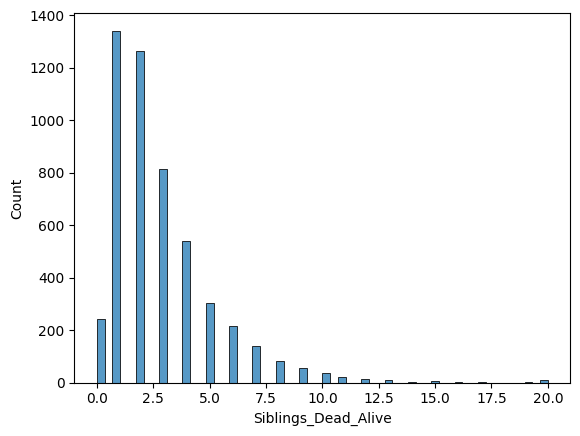

In [38]:
sns.histplot(x = 'Siblings_Dead_Alive', data =df)

<Axes: xlabel='Siblings_Dead_Alive'>

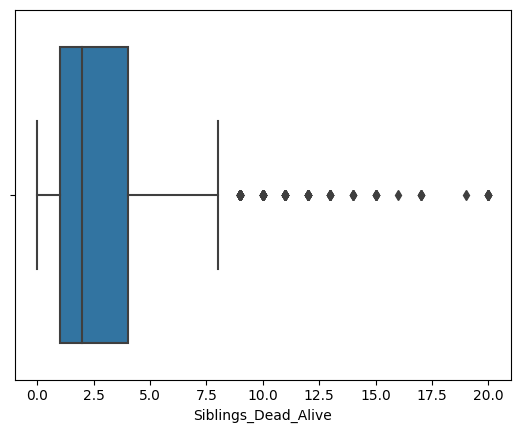

In [39]:
sns.boxplot(x = 'Siblings_Dead_Alive', data =df)

In [9]:
df['H4ED9'].value_counts()

      1390
97    1211
7     1063
6      992
5      450
1      301
4      286
8      261
3      189
2      179
9      153
98      26
96       3
Name: H4ED9, dtype: int64

In [10]:
df['EXP'] = df['H4ED9']

In [11]:
df['EXP'] = df['EXP'].loc[ df['EXP'] !='98']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='96']
df['EXP'] = df['EXP'].loc[ df['EXP'] !='97']
df['EXP'] = df['EXP'].loc[ df['EXP'] !=' ']
df['EXP'].value_counts()

7    1063
6     992
5     450
1     301
4     286
8     261
3     189
2     179
9     153
Name: EXP, dtype: int64

<Axes: ylabel='EXP'>

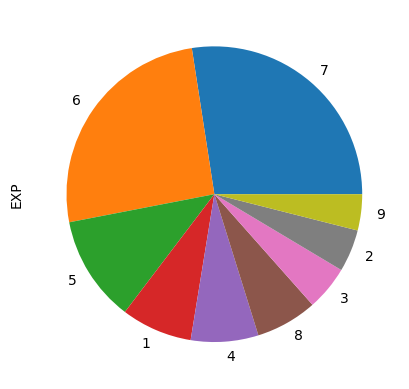

In [12]:
#Basic Pie Chart
df['EXP'].value_counts().plot(kind ='pie')

<Axes: >

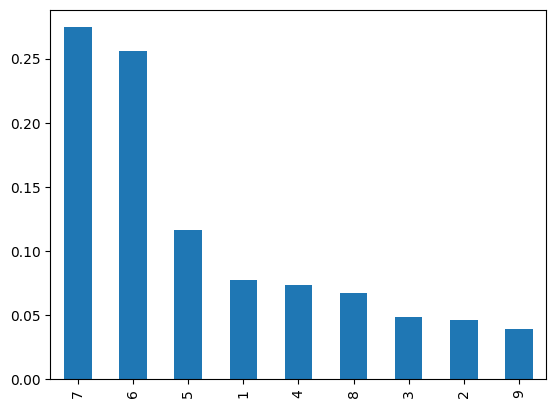

In [13]:
#Basic Bar Chart
df['EXP'].value_counts(normalize = True).plot(kind ='bar')